# IRIS Classification :

by :Tanishq Soni

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
iris = pd.read_csv('iris.data.csv',header = None)
iris.columns = ['sepal length','sepal width','petal length','petal width','species']

In [3]:
iris.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.shape

(150, 5)

In [5]:
iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width',
       'species'],
      dtype='object')

In [8]:
iris.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

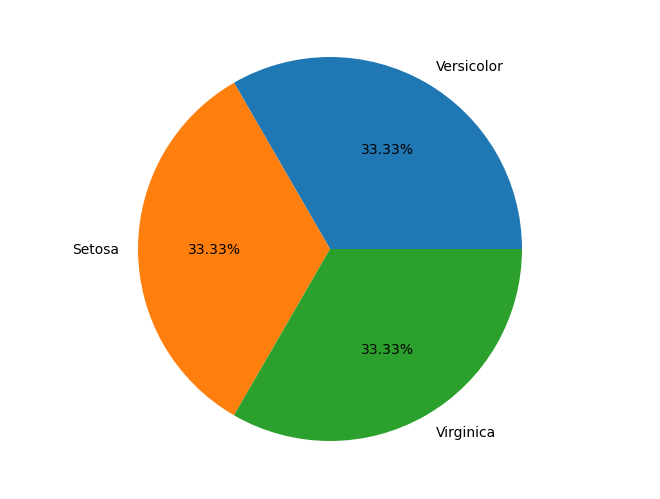

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

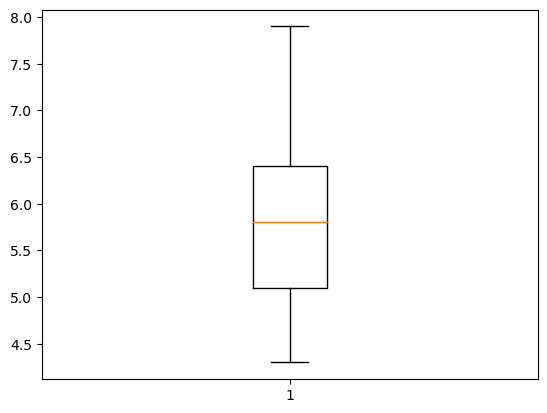

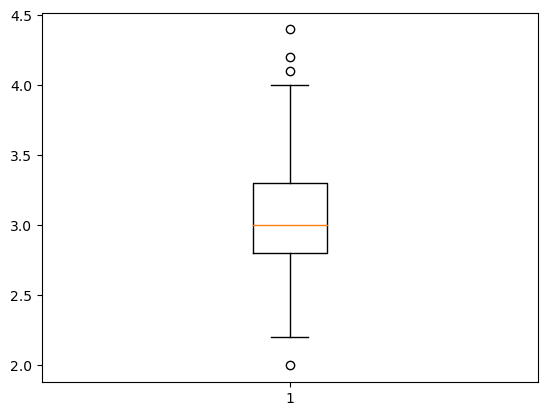

In [10]:
#Checking for outliars
import matplotlib.pyplot as plt
plt.figure(1)
plt.boxplot([iris['sepal length']])
plt.figure(2)
plt.boxplot([iris['sepal width']])
plt.show()

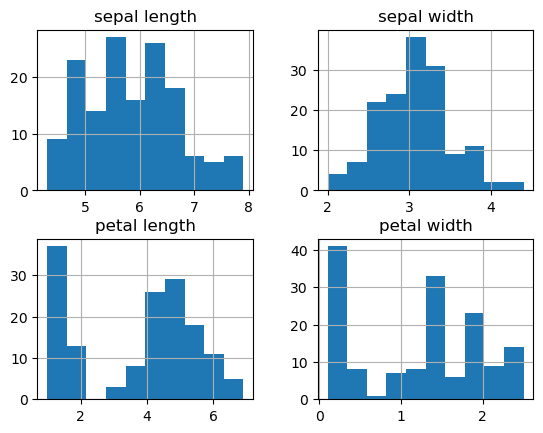

In [11]:
iris.hist()
plt.show()

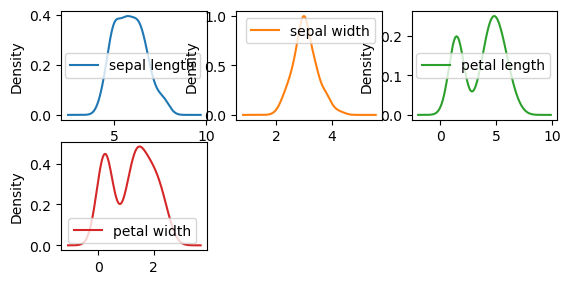

In [12]:
iris.plot(kind ='density',subplots = True, layout =(3,3),sharex = False);


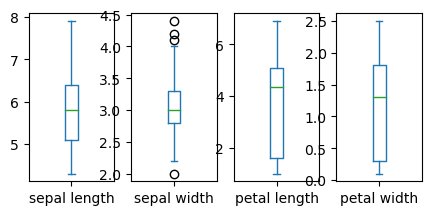

In [13]:
iris.plot(kind ='box',subplots = True, layout =(2,5),sharex = False);


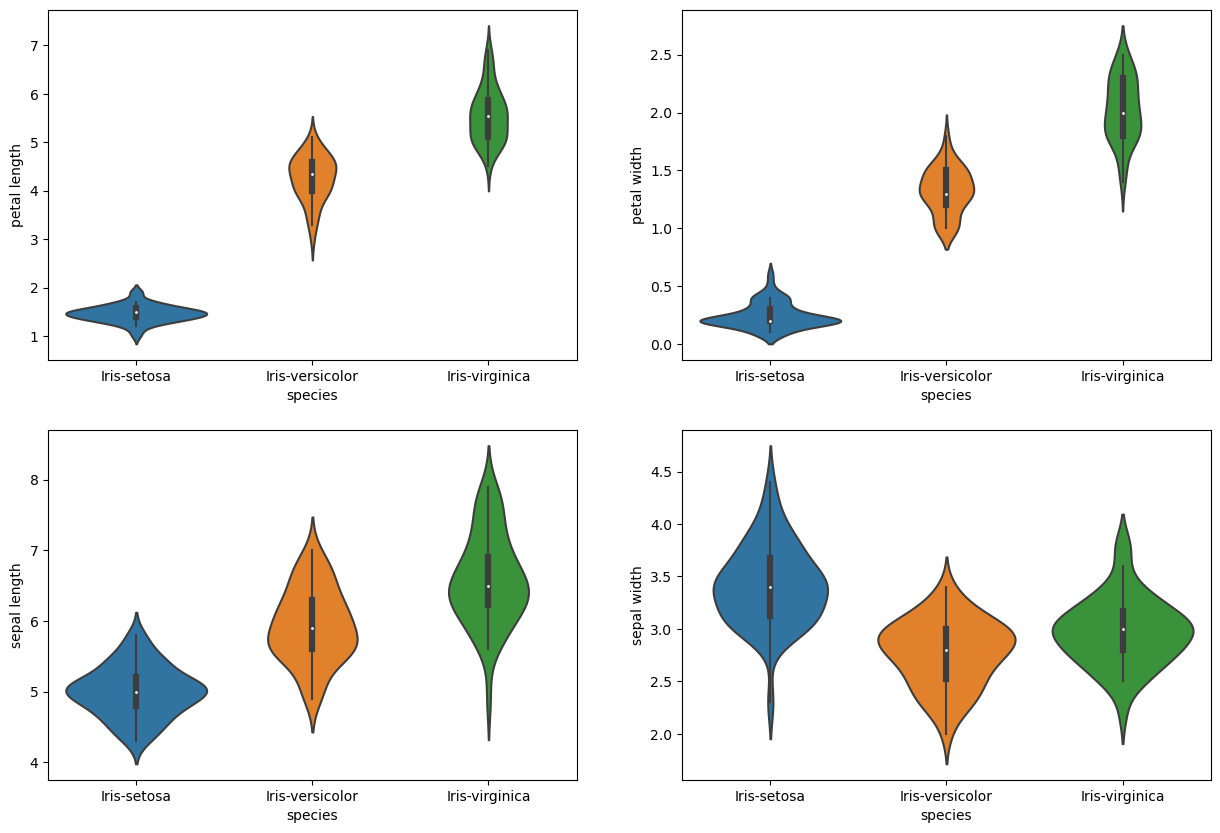

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already imported the 'iris' dataset from your data source

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.violinplot(x='species', y='petal length', data=iris)

plt.subplot(2, 2, 2)
sns.violinplot(x='species', y='petal width', data=iris)

plt.subplot(2, 2, 3)
sns.violinplot(x='species', y='sepal length', data=iris)

plt.subplot(2, 2, 4)
sns.violinplot(x='species', y='sepal width', data=iris)

plt.show()


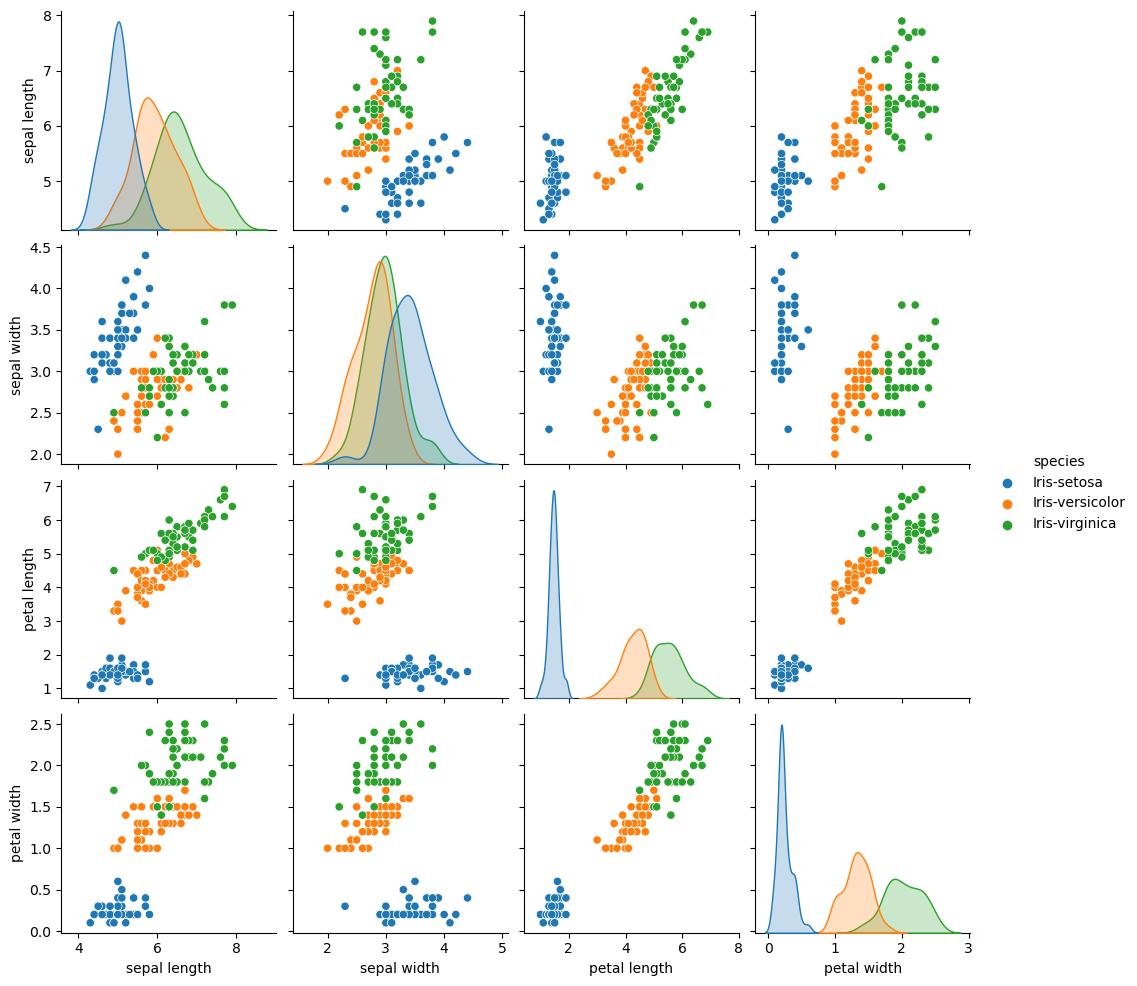

In [15]:
sns.pairplot(iris,hue='species');


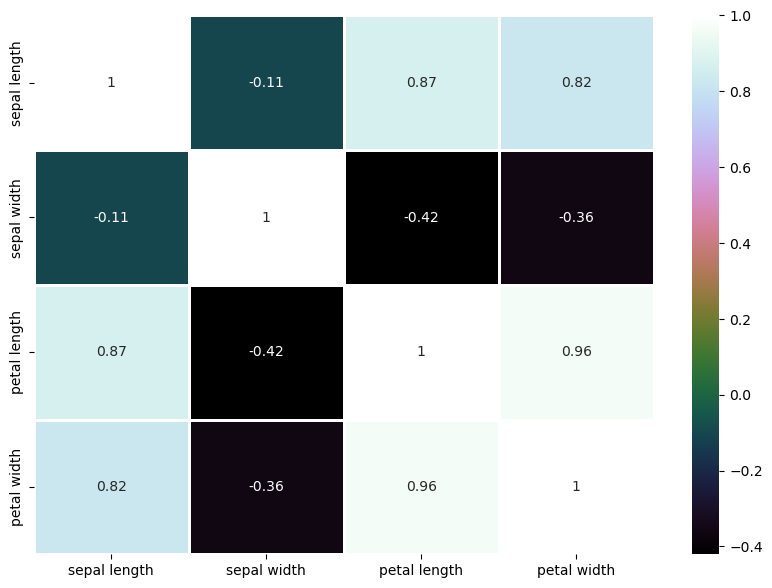

In [16]:
#Heat Maps
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(iris.corr(),annot=True,cmap='cubehelix',linewidths=1)

In [17]:
X = iris['sepal length'].values.reshape(-1,1)
Y = iris['sepal width'].values.reshape(-1,1)

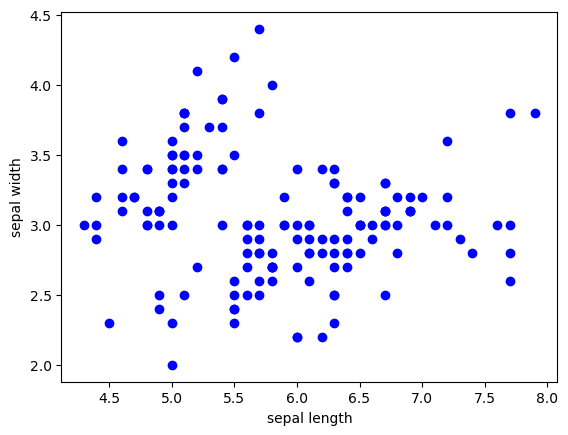

In [18]:
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.scatter(X,Y,color='b')
plt.show()

In [19]:
#Correlation 
corr_mat = iris.corr()
print(corr_mat)

              sepal length  sepal width  petal length  petal width
sepal length      1.000000    -0.109369      0.871754     0.817954
sepal width      -0.109369     1.000000     -0.420516    -0.356544
petal length      0.871754    -0.420516      1.000000     0.962757
petal width       0.817954    -0.356544      0.962757     1.000000


In [20]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [21]:
train, test = train_test_split(iris, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 5)
(38, 5)


In [22]:
train_X = train[['sepal length', 'sepal width', 'petal length',
                 'petal width']]
train_y = train.species

test_X = test[['sepal length', 'sepal width', 'petal length',
                 'petal width']]
test_y = test.species

In [23]:
train_X.head()


,sepal length,sepal width,petal length,petal width
41,4.5,2.3,1.3,0.3
62,6.0,2.2,4.0,1.0
126,6.2,2.8,4.8,1.8
125,7.2,3.2,6.0,1.8
53,5.5,2.3,4.0,1.3


In [24]:
test_y.head()


67     Iris-versicolor
18         Iris-setosa
138     Iris-virginica
143     Iris-virginica
110     Iris-virginica
Name: species, dtype: object

In [25]:
test_y.head()


67     Iris-versicolor
18         Iris-setosa
138     Iris-virginica
143     Iris-virginica
110     Iris-virginica
Name: species, dtype: object

In [26]:
#Using LogisticRegression
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
Logistic = metrics.accuracy_score(prediction,test_y)
print(Logistic)

0.9736842105263158


In [27]:
#Confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(test_y,prediction)
print("Confusion matrix: \n",confusion_mat)
print(classification_report(test_y,prediction))

Confusion matrix: 
 [[13  0  0]
 [ 0 13  1]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [28]:
#Using Support Vector
from sklearn.svm import SVC
model1 = SVC()
model1.fit(train_X,train_y)

pred_y = model1.predict(test_X)

from sklearn.metrics import accuracy_score
SVM = accuracy_score(test_y,pred_y)
print(SVM)

1.0


In [29]:
#Using KNN Neighbors
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(train_X,train_y)
y_pred2 = model2.predict(test_X)

from sklearn.metrics import accuracy_score
KNN = accuracy_score(test_y,y_pred2)
print(KNN)

0.9736842105263158


In [30]:
#Using GaussianNB
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(train_X,train_y)
y_pred3 = model3.predict(test_X)

from sklearn.metrics import accuracy_score
GaussianNB_ = accuracy_score(test_y,y_pred3)
print(GaussianNB_)

0.9473684210526315


In [31]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(train_X,train_y)
y_pred4 = model4.predict(test_X)

from sklearn.metrics import accuracy_score
decision_acc = accuracy_score(test_y,y_pred4)
print(decision_acc)

0.9473684210526315


In [32]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'Naive Bayes','KNN' ,'Decision Tree'],
    'Score': [Logistic,SVM,KNN,GaussianNB_,decision_acc]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
1.000000,Support Vector Machines
0.973684,Logistic Regression
0.973684,Naive Bayes
0.947368,KNN
0.947368,Decision Tree


Conclusion : SVM is giving us the best accuracy out of the other classification algorithm.